# Language Identifier Using Word Bigrams

Based on [Language Identifier by asif31iqbal](https://github.com/asif31iqbal/language-identifier)

## 0. Importing libraries and creating helper tokenize method

In [1]:
import pickle
import string
import os
from nltk import ngrams, FreqDist, word_tokenize
from numpy import arange
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def ultimate_tokenize(sentence):
    # Remove punctuation and digits
    sentence = sentence.translate(str.maketrans('', '', string.punctuation + string.digits))
    return word_tokenize(sentence.lower())

## 1. Understanding the process

In [3]:
simple_example_text = 'Oh, then, I see Queen Mab hath been with you.'

simple_example_tokens_words = ultimate_tokenize(simple_example_text)
simple_example_tokens_words

['oh', 'then', 'i', 'see', 'queen', 'mab', 'hath', 'been', 'with', 'you']

In [4]:
simple_example_tokens_chars = list(simple_example_tokens_words[0])
simple_example_tokens_chars

['o', 'h']

In [5]:
simple_example_tokens_words_unigrams = list(ngrams(simple_example_tokens_words, 1))
simple_example_tokens_words_unigrams

[('oh',),
 ('then',),
 ('i',),
 ('see',),
 ('queen',),
 ('mab',),
 ('hath',),
 ('been',),
 ('with',),
 ('you',)]

In [6]:
simple_example_tokens_words_bigrams = list(ngrams(simple_example_tokens_words, 2, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_'))
simple_example_tokens_words_bigrams

[('_', 'oh'),
 ('oh', 'then'),
 ('then', 'i'),
 ('i', 'see'),
 ('see', 'queen'),
 ('queen', 'mab'),
 ('mab', 'hath'),
 ('hath', 'been'),
 ('been', 'with'),
 ('with', 'you'),
 ('you', '_')]

In [7]:
fdist = FreqDist(simple_example_tokens_words_unigrams)
fdist

FreqDist({('oh',): 1, ('then',): 1, ('i',): 1, ('see',): 1, ('queen',): 1, ('mab',): 1, ('hath',): 1, ('been',): 1, ('with',): 1, ('you',): 1})

In [8]:
unigram_dict = dict()
for k, v in fdist.items():
        unigram_dict[' '.join(k)] = v
unigram_dict

{'oh': 1,
 'then': 1,
 'i': 1,
 'see': 1,
 'queen': 1,
 'mab': 1,
 'hath': 1,
 'been': 1,
 'with': 1,
 'you': 1}

In [9]:
file = 'ngram_langid_files/LangId.train.English.txt'
with open(file, encoding='utf8') as f:
        content = f.read().lower()
content.replace('\n', '')[:100]

"approval of the minutes of the previous sitting the minutes of yesterday 's sitting have been distri"

In [10]:
with open('ngram_langid_files/English.unigram.pickle', 'rb') as handle:
    unigram_english_dict = pickle.load(handle)
unigram_english_dict

{'approval': 3,
 'of': 2769,
 'the': 5699,
 'minutes': 11,
 'previous': 13,
 'sitting': 11,
 'yesterday': 15,
 's': 244,
 'have': 491,
 'been': 193,
 'distributed': 4,
 'are': 571,
 'there': 229,
 'any': 98,
 'comments': 9,
 'mr': 371,
 'president': 270,
 'on': 865,
 'monday': 11,
 'i': 721,
 'made': 61,
 'a': 1343,
 'point': 70,
 'order': 76,
 'about': 93,
 'nicole': 1,
 'fontaine': 4,
 'reported': 2,
 'in': 1668,
 'british': 16,
 'press': 13,
 'regarding': 23,
 'her': 51,
 'recent': 12,
 'visit': 6,
 'with': 449,
 'majesty': 1,
 'queen': 3,
 'elizabeth': 1,
 'ii': 1,
 'labour': 14,
 'member': 111,
 'this': 887,
 'house': 49,
 'miller': 2,
 'repeated': 6,
 'what': 132,
 'were': 82,
 'purported': 1,
 'to': 2490,
 'be': 620,
 'remarks': 1,
 'not': 525,
 'once': 27,
 'but': 240,
 'three': 21,
 'times': 11,
 'tuesday': 8,
 'and': 2040,
 'wednesday': 2,
 'he': 72,
 'sought': 5,
 'drag': 1,
 'into': 78,
 'political': 51,
 'controversy': 2,
 'use': 45,
 'name': 16,
 'score': 2,
 'cheap': 7,


In [11]:
with open('ngram_langid_files/English.bigram.pickle', 'rb') as handle:
    bigram_english_dict = pickle.load(handle)
bigram_english_dict

{'_ approval': 1,
 'approval of': 3,
 'of the': 906,
 'the minutes': 6,
 'minutes of': 2,
 'the previous': 9,
 'previous sitting': 2,
 'sitting the': 1,
 'of yesterday': 2,
 'yesterday s': 5,
 's sitting': 1,
 'sitting have': 1,
 'have been': 65,
 'been distributed': 1,
 'distributed are': 1,
 'are there': 5,
 'there any': 1,
 'any comments': 1,
 'comments mr': 1,
 'mr president': 192,
 'president on': 8,
 'on monday': 10,
 'monday i': 1,
 'i made': 1,
 'made a': 3,
 'a point': 8,
 'point of': 17,
 'of order': 6,
 'order about': 1,
 'about president': 1,
 'president nicole': 1,
 'nicole fontaine': 1,
 'fontaine s': 1,
 's reported': 1,
 'reported comments': 1,
 'comments in': 1,
 'in the': 442,
 'the british': 9,
 'british press': 1,
 'press regarding': 1,
 'regarding her': 1,
 'her recent': 1,
 'recent visit': 2,
 'visit with': 1,
 'with her': 2,
 'her majesty': 1,
 'majesty queen': 1,
 'queen elizabeth': 1,
 'elizabeth ii': 1,
 'ii a': 1,
 'a british': 1,
 'british labour': 1,
 'labo

In [12]:
bigram_english_dict.get('of the')

906

In [13]:
import operator
english_unigram_freqs = sorted(unigram_english_dict.items(), key=operator.itemgetter(1), reverse=True)
english_unigram_freqs[:10]

[('the', 5699),
 ('of', 2769),
 ('to', 2490),
 ('and', 2040),
 ('in', 1668),
 ('a', 1343),
 ('is', 1303),
 ('that', 1205),
 ('this', 887),
 ('on', 865)]

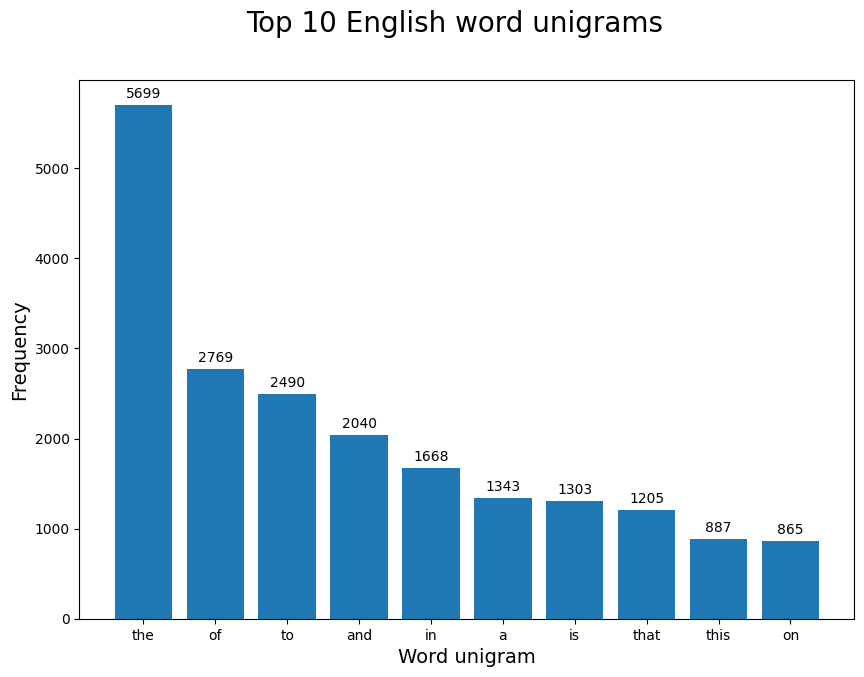

In [14]:
labels, values = zip(*english_unigram_freqs[:10])
indexes = arange(len(labels))
width = 0.8 # width = 1 would give bars that overlap because they are too close.

fig = plt.figure(figsize=(10,7))
ax = fig.gca() # Get current axis
rects = ax.bar(indexes, values, width)

# Add title and axis labels
fig.suptitle('Top 10 English word unigrams', fontsize=20)
plt.xlabel('Word unigram', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display value of each bar on bar
for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 50 + height, '%d' % int(height), ha='center', va='bottom') # Can also add color and fontweight arguments.

# Remove the default x-axis tick numbers and use tick numbers of your own choosing:
ax.set_xticks(indexes)
# Replace the tick numbers with strings:
ax.set_xticklabels(labels)

plt.show()
# plt.savefig('top10EnglishWordUnigrams.png')

## 1. Generating unigram and bigram frequencies for English, French and Italian from training files

In [15]:
def get_ngram_count_dict(tokens, n):
    if n == 1:
        n_grams = ngrams(tokens, n)
    else:
        n_grams = ngrams(tokens, n, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_') # Fun fact: If I remove padding here and later when testing, and also remove the '_' from the unigram dicts, the accuracy rises slightly. However, it's not statistically significant due to the small size of the data.
    fdist = FreqDist(n_grams)
    ngram_dict = dict()
    for k,v in fdist.items():
        ngram_dict[' '.join(k)] = v
    return ngram_dict

# Calls get_ngram_count_dict to get a unigram and bigram dict from file.
def get_unigram_bigram_dicts(file):
    with open(file, encoding='utf8') as f:
        content = f.read()
    tokens = ultimate_tokenize(content)
    unigram_dict = get_ngram_count_dict(tokens, 1)
    bigram_dict = get_ngram_count_dict(tokens, 2)
    return unigram_dict, bigram_dict

# Dumps unigram and bigram dictionary of training data of given language to .pickle files.
def dump_pickle(language):
    training_file = 'ngram_langid_files/LangId.train.' + language + '.txt'
    unigram_dict, bigram_dict = get_unigram_bigram_dicts(training_file)
    with open('ngram_langid_files/' + language + '.unigram.pickle', 'wb') as handle:
        pickle.dump(unigram_dict, handle, protocol=pickle.HIGHEST_PROTOCOL) # HIGHEST_PROTOCOL instructs pickle to use the highest protocol version available.
    with open('ngram_langid_files/' + language + '.bigram.pickle', 'wb') as handle:
        pickle.dump(bigram_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

dump_pickle('English')
dump_pickle('French')
dump_pickle('Italian')

Later, it will also be required to know how many sentences there are in the training data for each language. This is because of the method used to calculate probabilities (incorporating the probability of the bigram among other bigrams starting with the same word) and the fact we use padding for our bigrams. 

In our training data each line is a sentence, which is very convenient for calculating the number of sentences.

We go ahead and get the number of sentences (for more efficiency, the following code could be added to `get_unigram_bigram_dicts`):

In [16]:
with open('ngram_langid_files/LangId.train.English.txt', encoding='utf8') as f:
    for i, l in enumerate(f):
        pass
number_of_sents_en = i + 1
with open('ngram_langid_files/LangId.train.French.txt', encoding='utf8') as f:
    for i, l in enumerate(f):
        pass
number_of_sents_fr = i + 1
with open('ngram_langid_files/LangId.train.Italian.txt', encoding='utf8') as f:
    for i, l in enumerate(f):
        pass
number_of_sents_it = i + 1

print('NUMBER OF SENTENCES IN TRAINING DATA')
print('English:', number_of_sents_en)
print('French:', number_of_sents_fr)
print('Italian:', number_of_sents_it)

NUMBER OF SENTENCES IN TRAINING DATA
English: 2980
French: 2980
Italian: 2821


## 2. Identifying language for each line of the test file using bigram probabilities

In [17]:
with open('ngram_langid_files/English.unigram.pickle', 'rb') as handle:
    unigram_english_dict = pickle.load(handle)

with open('ngram_langid_files/English.bigram.pickle', 'rb') as handle:
    bigram_english_dict = pickle.load(handle)

with open('ngram_langid_files/French.unigram.pickle', 'rb') as handle:
    unigram_french_dict = pickle.load(handle)

with open('ngram_langid_files/French.bigram.pickle', 'rb') as handle:
    bigram_french_dict = pickle.load(handle)

with open('ngram_langid_files/Italian.unigram.pickle', 'rb') as handle:
    unigram_italian_dict = pickle.load(handle)

with open('ngram_langid_files/Italian.bigram.pickle', 'rb') as handle:
    bigram_italian_dict = pickle.load(handle)

vocabulary_size = len(unigram_english_dict) + len(unigram_french_dict) + len(unigram_italian_dict)
vocabulary_size

22705

In [18]:
# Get probability of given bigram belonging to the language which bigram_dict is in
def get_bigram_probability(bigram, first_word, bigram_dict, first_word_dict): # first_word is the first word of the word bigram.
    bigram_count = bigram_dict.get(bigram)
    if bigram_count is None:
        bigram_count = 0

    first_word_count = first_word_dict.get(first_word)
    if first_word_count is None:
        first_word_count = 0

    return (bigram_count + 1) / (first_word_count + vocabulary_size) # To get the logic of this formula, note how the proability is used in the function below. Without the + 1 in the Nr, if you find a bigram which is not in our known bigrams for a language, the probability of it being in that language would become 0. So we would like to assign a small probability of 1 / vocabulary_size in that case. Also note the arbitrariness of this 'probability'. We're saying "Given a bigram and a language, what is the probability that the bigram is of that language?" This is arbitrary because to get a meaningful probability we need to know which are the other languages considered and what their bigram frequencies are. That would be another way to do it, but arguable a worse one because it wouldn't be able to give a confidence score for a particular language. The formula just uses common sense to get to a number which works for the purposes. In the denominator, we have both first_word_count and vocabulary_size. Why? We have vocabulary_size for all langs in the denom because the larger this is, the less significant it is that for this particular language the bigram appears so many times. Could we have used a vocab_size of bigrams instead of unigrams? Sure, and the 'probabilities' would end up being much smaller numbers. What about first_word_count? This gives us a way to compare this bigram against other bigrams in this language starting with the same word. In general though, for a given bigram, it's more important to consider how many times it exists than to consider whether it is the usual bigram given a certain first word. The formula achieves that. Take the bigram 'le monseiur' and the English language. Let's say the bigram appears once and 'le' also appears once, while in French 'le monseiur' appears 100 times and le appears 100,000 times. Probability for English = (1 + 1) / (1 + 20,000) = 0.000099995. Probability for French = (100 + 1) / (100,000 + 20,000) = 0.00084166666. Note how the probability for French is still low because 100/100,000 is quite low and maybe it's not French after all if in French le is usually followed by other words. However, it's still significantly higher than the probability for English where both 'le' and 'le monseiur' only appear once.

# Get probability that a given bigram list is of a language (specified by its bigram_dict)
def get_language_probability(bigram_list, first_words, bigram_dict, first_word_dict):
    result = 1.0
    index = 0
    for bigram in bigram_list:
        result *= get_bigram_probability(bigram, first_words[index], bigram_dict, first_word_dict)
        index += 1
    return result

# Load correct solutions
solution_dict = dict()
with open('ngram_langid_files/LangId.sol.txt') as f:
    for line in f:
       (key, val) = line.split()
       solution_dict[int(key)] = val

line_no = 1
result_dict = dict()
correct = 0
incorrect_line_numbers = []

# This needs to be done because I'm using padding for bigrams so the unigram dicts in their raw forms can't be used in get_bigram_probability():
unigram_english_dict['_'] = number_of_sents_en
unigram_french_dict['_'] = number_of_sents_fr
unigram_italian_dict['_'] = number_of_sents_it

with open('ngram_langid_files/LangId.test.txt', encoding='utf8') as f:
    for line in f:
        tokens = ultimate_tokenize(line)
        bigrams = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_')
        bigram_list = [] # bigram_list will be exactly like bigrams but instead of [('_', 'this'), ...] it will be ['_ this', ...]. It is required because this is how bigrams are represented in the dictionary.
        first_words = [] # The first words of each bigram. This is the similar to making a unigram_list. We use it because we don't want something in the form [(this,), ...]. Also because we want this to include '_'. We want it to include '_' because we're not using the unigrams for classification but as part of a formula to judge bigram frequency based on the starting word.
        for b in bigrams:
            bigram_list.append(' '.join(b))
            first_words.append(b[0])

        english_prob = get_language_probability(bigram_list, first_words, bigram_english_dict, unigram_english_dict)
        french_prob = get_language_probability(bigram_list, first_words, bigram_french_dict, unigram_french_dict)
        italian_prob = get_language_probability(bigram_list, first_words, bigram_italian_dict, unigram_italian_dict)

        max_prob = max(english_prob, french_prob, italian_prob)
        if max_prob == english_prob:
            result_dict[line_no] = 'English'
        elif max_prob == french_prob:
            result_dict[line_no] = 'French'
        else:
            result_dict[line_no] = 'Italian'

        if solution_dict[line_no] == result_dict[line_no]:
            correct += 1
        else:
            incorrect_line_numbers.append(line_no)

        line_no += 1

# Storing results from result_dict to file:
with open('ngram_langid_files/LangId.result.txt', 'w') as f:
    for key, val in result_dict.items():
        f.write(' '.join([str(key), val]) + '\n')

print('Accuracy: {:2.2f}%'.format(correct * 100 / len(solution_dict)))

Accuracy: 98.00%


In [19]:
print('Line numbers for incorrectly classified languages: {}'.format(str(incorrect_line_numbers)))

Line numbers for incorrectly classified languages: [24, 87, 187, 191, 247, 279]


## 3. Testing with our own sentence

In [20]:
sent = "This is a sentence."
sent_tokens = ultimate_tokenize(sent)
sent_bigrams_pre = ngrams(sent_tokens, 2, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_')
sent_bigrams = []
sent_bigrams_first_words = []
for b in sent_bigrams_pre:
    sent_bigrams.append(' '.join(b))
    sent_bigrams_first_words.append(b[0])
print('Sentence bigrams:', sent_bigrams)
print('Sentence bigrams first words:', sent_bigrams_first_words)

Sentence bigrams: ['_ this', 'this is', 'is a', 'a sentence', 'sentence _']
Sentence bigrams first words: ['_', 'this', 'is', 'a', 'sentence']


In [21]:
sent_english_prob = get_language_probability(sent_bigrams, sent_bigrams_first_words, bigram_english_dict, unigram_english_dict)
sent_french_prob = get_language_probability(sent_bigrams, sent_bigrams_first_words, bigram_french_dict, unigram_french_dict)
sent_italian_prob = get_language_probability(sent_bigrams, sent_bigrams_first_words, bigram_italian_dict, unigram_italian_dict)
print("RAW 'PROBABILITIES'")
print('English:', sent_english_prob)
print('French:', sent_french_prob)
print('Italian:', sent_italian_prob)
# As we can see, these 'probabilities' are arbitrary. We can try to convert them to percentages since we are classifying only among these 3 languages:

RAW 'PROBABILITIES'
English: 1.6907852103961136e-18
French: 1.4294173998895933e-22
Italian: 1.4086603160283195e-22


In [22]:
def get_normalized_probabilities(list_of_probabilities):
    sum_of_probabilities = sum(list_of_probabilities)
    result = []
    for probability in list_of_probabilities:
        result.append(probability / sum_of_probabilities)
    return result

probabilities = [sent_english_prob, sent_french_prob, sent_italian_prob]
normalized_probabilities = get_normalized_probabilities(probabilities)

print('RELATIVE PROBABILITIES')
print('English: ', round(normalized_probabilities[0] * 100, 2), '%', sep='') # I use sep because I don't want a space before the % sign.
print('French: ', round(normalized_probabilities[1] * 100, 2), '%', sep='')
print('Italian: ', round(normalized_probabilities[2] * 100, 2), '%', sep='')

RELATIVE PROBABILITIES
English: 99.98%
French: 0.01%
Italian: 0.01%


**PS:** For a state-of-the-art Greek dialect classifier using n-grams, take a look at [Greek Dialect Classifier](https://github.com/hb20007/greek-dialect-classifier).